1300
1283


<Figure size 640x480 with 0 Axes>

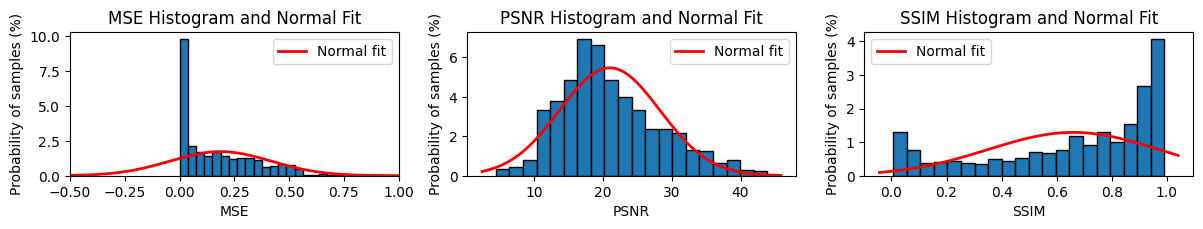

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re
from matplotlib.ticker import FuncFormatter

def plotstatistic(psnr_list, ssim_list, mse_list, statisticdir):
    # 绘制统计图
    def to_percent(y,position):
        return str(int((100*y))) #+"%"#这里可以用round（）函数设置取几位小数
    # binss0 = 40
    binss = 20

    plt.clf()
    plt.figure(figsize=(12, 6))

    #-----------------------------------mse-------------------------------------------
    mse_threshold = 2
    mse_list = [m for m in mse_list if m <= mse_threshold]
    print(len(mse_list))
    # MSE 直方图和正态分布曲线
    plt.subplot(3, 3, 1)
    # counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', density=True, stacked=True)
    counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', range=(0,0.75), density=True)
    # print(f'counts{counts},bins{bins},patches{patches}')

    # fomatter=FuncFormatter(to_percent)#这里把刻度乘了100，为了得到百分比纵轴
    # plt.gca().yaxis.set_major_formatter(fomatter)

    mu, std = norm.fit(mse_list)
    # x = np.linspace(-5, 15, 1000)
    x = np.linspace(min(mse_list)-0.5, max(mse_list)+0.5, 1000)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
    plt.xlim(-0.5, 1)  # 限制横坐标范围
    plt.xlabel('MSE')
    # plt.ylabel('Probability of samples')
    plt.ylabel('Probability of samples (%)')
    plt.title('MSE Histogram and Normal Fit')
    plt.legend()

    #-----------------------------------PSNR-------------------------------------------
    # PSNR 直方图和正态分布曲线
    plt.subplot(3, 3, 2)
    # counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black', density=True, stacked=True)
    counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black', density=True)
    fomatter=FuncFormatter(to_percent)
    plt.gca().yaxis.set_major_formatter(fomatter)
    mu, std = norm.fit(psnr_list)
    # x = np.linspace(15,45, 1000)
    x = np.linspace(min(psnr_list)-2, max(psnr_list)+2, 1000)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
    # plt.xlim(-5, 15)  # 限制横坐标范围
    plt.xlabel('PSNR')
    # plt.ylabel('Probability of samples')
    plt.ylabel('Probability of samples (%)')
    plt.title('PSNR Histogram and Normal Fit')
    plt.legend()

    #-----------------------------------SSIM-------------------------------------------
    # SSIM 直方图和正态分布曲线
    plt.subplot(3, 3, 3)
    # counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True, stacked=True)
    counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True)
    # fomatter=FuncFormatter(to_percent)
    # plt.gca().yaxis.set_major_formatter(fomatter)
    mu, std = norm.fit(ssim_list)
    # x = np.linspace(0.6,1.1, 1000)
    x = np.linspace(min(ssim_list)-0.05, max(ssim_list)+0.05, 1000)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
    # plt.xlim(0.55, 1.1)  # 限制横坐标范围
    plt.xlabel('SSIM')
    # plt.ylabel('Probability of samples')
    plt.ylabel('Probability of samples (%)')
    plt.title('SSIM Histogram and Normal Fit')
    plt.legend()

    plt.tight_layout()
    plt.show()
    # plt.savefig(statisticdir)

with open('output/inference/alog.txt', 'r') as f:
    lines = f.readlines()
# 初始化列表变量
psnrs = []
ssims = []
mses = []
binss = 40
# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1)) 
        # 将值添加到对应的列表中
        psnrs.append(psnr)
        ssims.append(ssim)
        mses.append(mse)

print(len(mses))
statisdir = 'sta.png'

plotstatistic(psnrs,ssims,mses,statisdir)
# plotstatistic2(psnrs,ssims,mses,statisdir)

In [ ]:

def plotstatistic2(psnr_list, ssim_list, mse_list, statisticdir):
    """
    绘制 MSE、PSNR 和 SSIM 的直方图及正态分布曲线，并保存到指定目录。
    
    参数:
    psnr_list (list): PSNR 值列表
    ssim_list (list): SSIM 值列表
    mse_list (list): MSE 值列表
    statisticdir (str): 保存统计图的目录
    """
    def to_percent(y, position):
        return str(int(100 * y)) + '%'
    binss = 40 #这一行决定了有多少柱子

    plt.clf()
    plt.figure(figsize=(12, 2.5))

    mse_threshold = 7
    mse_list = [m for m in mse_list if m <= mse_threshold]
    metrics = [
        (mse_list, 'MSE', 0.5),
        (psnr_list, 'PSNR', 2),
        (ssim_list, 'SSIM', 0.05)
    ]

    for i, (metric_list, metric_name, x_padding) in enumerate(metrics, 1):
        plt.subplot(1, 3, i)  # 修改为 (1, 3, i) 以适应单行三图的布局
        counts, bins, patches = plt.hist(metric_list, bins=binss, edgecolor='black', density=True)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
        mu, std = norm.fit(metric_list)
        if metric_name == "MSE":
            x = np.linspace(min(metric_list) - x_padding, max(metric_list) + x_padding, 1000)#这一行决定了横坐标
            plt.xlim(-0.5, 1.5)  # 限制横坐标范围
        elif metric_name == "PSNR":
            x = np.linspace(min(metric_list) - x_padding, max(metric_list) + x_padding, 1000)#这一行决定了横坐标
        elif metric_name == 'SSIM':
            x = np.linspace(min(metric_list) - x_padding, max(metric_list) + x_padding, 1000)#这一行决定了横坐标

        plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
        plt.xlabel(metric_name)
        plt.ylabel('Probability of samples (%)')
        plt.title(f'{metric_name} Histogram and Normal Fit')
        plt.legend()

    plt.tight_layout()
    plt.show()
    # plt.savefig(statisticdir)